# 07b - MCMC for Rh(111)

This notebook reproduces Fig. 7b from the manuscript and Fig. S31 from the Supporting Information. The data in this notebook compares the initial and sampled binding energies for the Rh(111) + *CHOH + *CO structures before and after the MCMC.

In [1]:
import json
import itertools
from basics import *
from plotting import *
from matplotlib import cm
from ase import Atoms

plt.style.use("paper")

## Visualizing the Monte Carlo approach

In [2]:
NUM_SITES = 9
ORIGINAL = "#2F4259"
SAMPLED = "#C84260"

In [3]:
old = pd.read_json("../data/231003-Rh-data.json")
df = pd.read_csv("../data/07-Rh111-mcmc/energies.csv.gz", compression="gzip", index_col=0)

In [4]:
len(old)

2920

In [5]:
len(df)

3534206

In [6]:
with open(f"../data/07-Rh111-mcmc/configs/23854-05.json", "r") as f:
    temps = json.load(f)["temperature"]

In [7]:
df.head()

,move,replica,energy,init,nads
0,0,0,-0.598346,23854,3
1,0,1,-1.111930,23854,3
2,0,2,0.021617,23854,3
3,0,3,0.591284,23854,3
4,0,4,-0.122871,23854,3


In [8]:
n = 5
subdf = df.loc[(df["nads"] == n) & (df["init"] == 23856)]
en = subdf.pivot(index="move", columns="replica", values="energy")
en = en / n

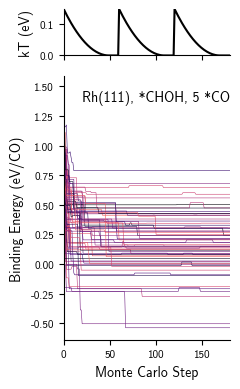

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(2.5, 4), sharex=True, height_ratios=[0.15, 0.85])

norm = plt.Normalize(0, 1.5)
cmap = lambda x: cm.magma(norm(x))

def random_color():
    return cmap(np.random.uniform())

ax = axs[0]
ax.plot(temps, "k-")
ax.set_ylim(0, 0.15)
ax.set_ylabel("kT (eV)")

ax = axs[1]
for i, row in en.T.iterrows():
    if i % 15 != 0:
        continue
    ax.plot(row.values, color=random_color(), linewidth=0.4)

ax.annotate(f"Rh(111), *CHOH, 5 *CO", (1.0, 0.95), xycoords="axes fraction", ha="right", va="top")
ax.set_ylabel("Binding Energy (eV/CO)")
ax.set_xlabel("Monte Carlo Step")
ax.set_xlim(0, 180)

fig.tight_layout()
savefig(fig, "07-Rh111-mcmc-profile.pdf")
plt.show()

## Visualizing the binding energy curve

In [10]:
sites = {
    23854: "bridge-1",
    23855: "bridge-2",
    23856: "top",
    23857: "bridge-3",
    
}

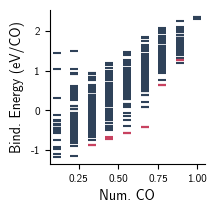

In [11]:
fig, ax = plt.subplots(figsize=(2, 2))

subold = old.loc[old["initial_crystal"] == 23856]

for n, grp in subold.groupby("num_adsorbates"):
    _x = np.ones(len(grp)) * n / NUM_SITES
    
    ax.scatter(
        _x,
        grp["unrelax_binding_site"],
        marker="_",
        s=35,
        color=ORIGINAL,
    )

subdf = df.loc[df["init"] == 23856]
NMAX = 3
for n, grp in subdf.groupby("nads"):
    _e = np.sort(grp["energy"].unique()) / n
    _x = np.ones(len(_e)) * n / NUM_SITES
    
    ax.scatter(
        _x[:NMAX],
        _e[:NMAX],
        marker="_",
        s=35,
        color=SAMPLED,
    )

ax.set_ylabel("Bind. Energy (eV/CO)")
ax.set_xlabel("Num. CO")

savefig(fig, "07-Rh111-binding.pdf")
plt.show()